This code is not organized and the generation part is missing. This is for supplementary figure only

In [ ]:
%matplotlib inline
# %matplotlib widget

In [2]:
import csv
import os
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd

from dotenv import load_dotenv
load_dotenv()

# import seaborn as sns

# sns.set(rc={'figure.facecolor':'white'})

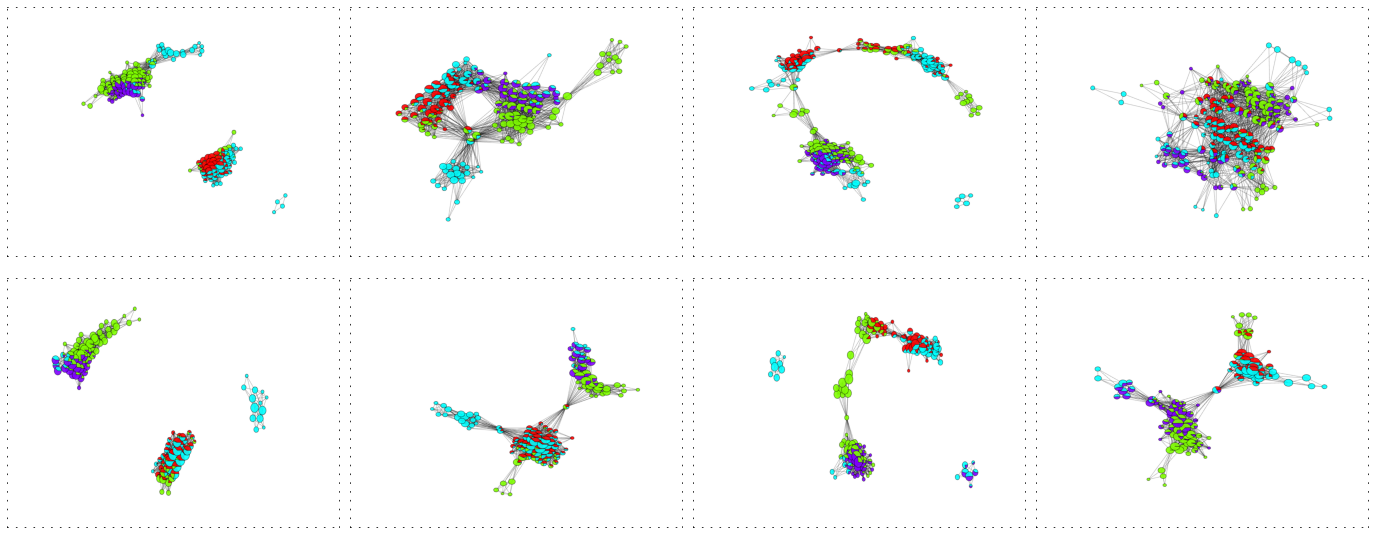

In [12]:
import math
from PIL import Image


def plot_image(img_path, ax):
    im = Image.open(img_path)
    img = np.array(im)
    ax.imshow(img)
    del img
    del im
    return ax


perplexities = [6, 20]

preps_dists = [
    ['preprocessed', '_euclidean_'],
    ['preprocessed', '_correlation_'],
    ['wtd-pen', '_cityblock_'],
    ['wtd-pen', '_correlation_'],
]

fig, axr = plt.subplots(len(perplexities), len(preps_dists), figsize=(8 * 1.2 * len(preps_dists) / len(perplexities), 8))

main_path = os.path.join(os.environ['WORKSPACE'], 'results/BDLMapperTest-w3c/tSNE_v2/')

linestyle = (0, (1, 10)) # dashed

for axc, perp in zip(axr, perplexities):
    for ax, (prelens_type, dist_type) in zip(axc, preps_dists):
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        ax.spines['top'].set_linestyle(linestyle)# .set_visible(False)
        ax.spines['right'].set_linestyle(linestyle)# .set_visible(False)
        ax.spines['bottom'].set_linestyle(linestyle)# .set_visible(False)
        ax.spines['left'].set_linestyle(linestyle)# .set_visible(False)
#         ax.grid(False)

        img_path = os.path.join(main_path, 'plot_task-tSNE{}-{}_{}.png'.format(dist_type, perp, prelens_type))
        plot_image(img_path, ax)
        
plt.tight_layout()
# plt.show()

plt.savefig(os.path.join(main_path,'tSNE.png'), dpi=200)
# plt.close(fig)
